# Radiative Transfer, Transmission and Emission

This week we will playing with radiative transfer through a planetary atmosphere, using some more and less realistic models that help demonstrate important concepts about transmission, emission, and global energy balance. Adapted from Zach Berta-Thompson.

In [1]:
import matplotlib.pyplot as plt, numpy as np
import astropy.units as un, astropy.constants as const
from astropy.io import ascii
from astropy.table import Table

%matplotlib inline

It might be useful to store functions and blocks of code in Python [modules](https://jakevdp.github.io/WhirlwindTourOfPython/13-modules-and-packages.html), which you `import` into your notebook and can then use. For example, see the `tools.py` file in this same directory, which contains the functions used in the previous programming project, and the block of code below. Look at `tools.py` to see what functions are available to you to use in this assignment.

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/var/folders/16/4qw75j1n2gzdn92jfprk8w5m0000gp/T/ipykernel_13885/1550772714.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Wavelength ($\mu m$)'); plt.ylabel('Flux ($W/m^2/\mu m$)');
/var/folders/16/4qw75j1n2gzdn92jfprk8w5m0000gp/T/ipykernel_13885/1550772714.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Wavelength ($\mu m$)'); plt.ylabel('Flux ($W/m^2/\mu m$)');


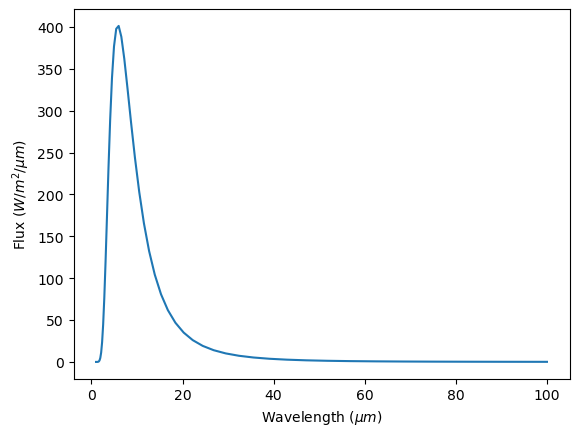

In [7]:
import tools
w = np.logspace(0,2)*un.um
plt.plot(w, tools.planck_flux(w, 500*un.K))
plt.xlabel('Wavelength ($\mu m$)'); plt.ylabel('Flux ($W/m^2/\mu m$)');
plt.show();

### Q1: Transmission through Earth's Atmosphere

The file `earthtransmission.txt` contains a model for the fractional transmittance $t_\lambda$ through Earth's atmosphere, looking straight up from Cerro Paranal in northern Chile. If you want, you can play around and calculate your own models at the [ESO SkyCalc](http://www.eso.org/observing/etc/bin/gen/form?INS.MODE=swspectr+INS.NAME=SKYCALC). This transmittance $t_\lambda$ is the fraction of light of a given wavelength that makes it through the atmosphere, which we can write as $t_\lambda = I_\lambda({\rm surface})/I_\lambda({\rm above~atmosphere})$. 

+ Plot the transmission through Earth's atmosphere vs. wavelength.

+ The photometric filters J, H, and K are commonly used in infrared astronomy. J runs from 1.15 to 1.35$\mu$m, H from 1.5 to 1.8$\mu$m, and K from 2 to 2.4$\mu$m (approximately). Plot a shaded vertical region corresponding to each bandpass (you want the function `plt.axvspan`). Comment briefly on how the bandpasses were defined.

+ Challenge question: to what molecule do the absorption features between 1 and 2.5 $\mu$m correspond?

In [8]:
trans = Table.read("earthtransmission.txt",format='ascii')

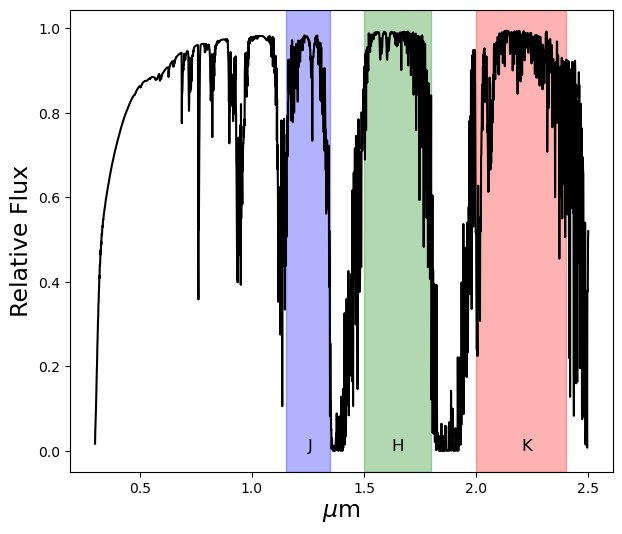

In [9]:
fig = plt.figure(figsize=(7,6))
plt.plot(trans['wavelength'],trans['transmission'],c='k')
plt.xlabel(r'$\mu$m',fontsize=17)
plt.ylabel('Relative Flux',fontsize=17)
plt.gca().axvspan(xmin=1.15,xmax=1.35,color='b',alpha=0.3)
plt.gca().text(1.25,0,"J",fontsize=12)
plt.gca().axvspan(xmin=1.5,xmax=1.8,color='g',alpha=0.3)
plt.gca().text(1.62,0,"H",fontsize=12)
plt.gca().axvspan(xmin=2.,xmax=2.4,color='r',alpha=0.3)
plt.gca().text(2.2,0,"K",fontsize=12)
plt.show()
# da molecules are probably water - h2o absorbtion lines

+ Imagine standing on the surface of the Earth with the Sun directly overhead ($\theta_z = 0^\circ$, where $\theta_z$ is the angle away from the zenith). Plot the spectrum of flux we would receive at the surface of the Earth, comparing (in the same plot) the actual flux received to the flux we would receive if there were no atmosphere. (You can approximate the Sun as a perfect thermal emitter with a radius of $1~R_\odot$ and $T_{\odot} = (L_\odot/4\pi R_\odot^2\sigma_{\rm SB})^{1/4}$, at a distance of $1~AU$.)

In [10]:
def planck_intensity(wavelength, temperature):
    h = const.h.cgs
    k = const.k_B.cgs
    c = const.c.cgs

    u = h*c/(wavelength*k*temperature)    
    
    intensity = (2*h*c**2/wavelength**5/(np.exp(u) - 1))/un.steradian
    return intensity.to('erg/(s*cm**2*micron*steradian)')

def planck_flux(wavelength, temperature):
    intensity = planck_intensity(wavelength, temperature)
    flux = np.pi * un.steradian * intensity
    
    return flux.to('erg/(s*cm**2*micron)')

In [12]:
T = ((const.L_sun.cgs / (4 * np.pi * const.R_sun.cgs**2 * const.sigma_sb.cgs))**(1/4)).decompose()
print(T)
wavelen = trans['wavelength']*un.micron
flux = planck_flux(wavelength=wavelen,temperature=T)

5772.003429098914 K


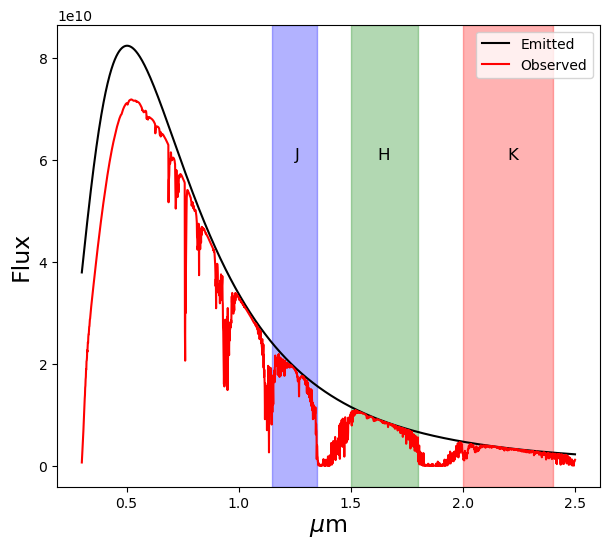

In [13]:
fig = plt.figure(figsize=(7,6))

plt.plot(wavelen,flux,color='k',label='Emitted')
plt.plot(wavelen,flux*trans['transmission'],c='r',label='Observed')
plt.xlabel(r'$\mu$m',fontsize=17)
plt.ylabel('Flux',fontsize=17)
plt.legend(loc='upper right')

plt.gca().axvspan(xmin=1.15,xmax=1.35,color='b',alpha=0.3)
plt.gca().text(1.25,6e10,"J",fontsize=12)
plt.gca().axvspan(xmin=1.5,xmax=1.8,color='g',alpha=0.3)
plt.gca().text(1.62,6e10,"H",fontsize=12)
plt.gca().axvspan(xmin=2.,xmax=2.4,color='r',alpha=0.3)
plt.gca().text(2.2,6e10,"K",fontsize=12)

plt.show()

+ Plot the optical depth $\tau_\lambda$ through Earth's atmosphere, considering a vertical path straight up out of the atmopshere. (Regardless of integration direction, quote this as a positive $\tau$).  You can check the order of magnitude of your plot by considering how the optical depth should vary as transmission goes from small (that is, where the least amount of light is let through) to large.


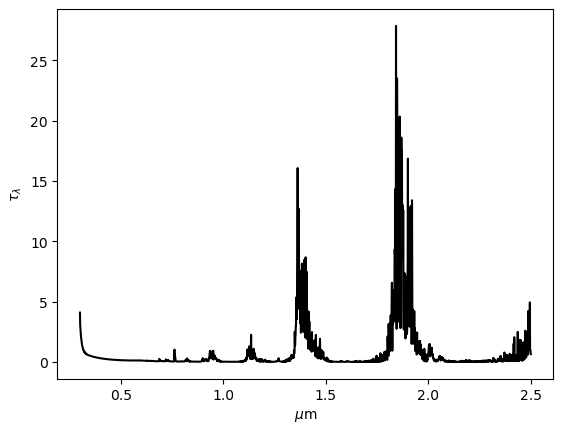

In [15]:
# e^-(tau) = obs/emm when no emission from atmosphere
plt.plot(wavelen, np.abs(np.log(trans['transmission'])),c='k')
plt.xlabel(r"$\mu$m")
plt.ylabel(r"$\tau_{\lambda}$")
plt.show()

<font color='seagreen'>

Note that the optical depth exceeds 1 only for fairly deep absorption lines (and pushing into the near-UV). There are many atmospheric windows with $\tau < 0.1$, meaning on average 1/10 photons interacts with the atmosphere. That's pretty clear!

Write an expression for the optical depth along a slant path $\tau_{\lambda}(\theta_z)$, if you are looking an angle $\theta_z$ away from zenith. This is a simple expression, and you can derive it with one triangle (with leg $s_z$, the zenith distance, and hypotenuse $s$, the distance along the slant path). Express $\tau_{\lambda}(\theta_z)$ in terms of the optical depth for a vertical path through the atmosphere and $\theta_z$.

+ Plot the solar flux at several representive angles of $\theta_z$ (make sure you get something close to 90 degrees)

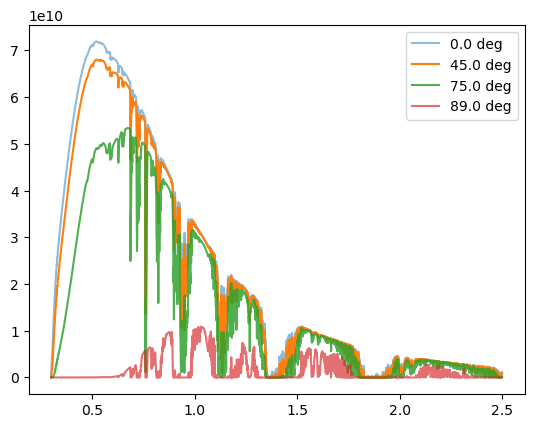

In [24]:
# depth as a func of theta (angle from zenith)
theta = np.array([0,45,75,89])*un.deg
alphas = np.linspace(0.5,1,len(theta))
tau_theta = []
for i,ang in enumerate(theta):
    tau_theta = (1/np.cos(ang.to(un.rad))) * (np.log(trans['transmission']))
    plt.plot(wavelen,flux * np.exp(-np.abs(tau_theta)),label=str(ang),alpha=alphas[-i])

plt.legend()
plt.show()


Earth-bound observational astronomers define the quantity "airmass" to be 
$${\rm airmass} = \sec\theta_z$$
where a star that is straight overhead has $\sec\theta_z = 1$ and a star on the horizon has $\sec\theta_z = \infty$. Since $\sec\theta=1/\cos\theta$, the airmass tells us how much atmosphere we are looking through. If something is at very high airmass, we probably want to wait to observe it until it's at low airmass and more light of it's light will make it through the atmosphere.

We use [the magnitude system](https://en.wikipedia.org/wiki/Apparent_magnitude) to express differences in brightness. A difference in magnitudes corresponds to a logarithm of their brightness ratios, with the definition that
$$m_1 - m_0 = -2.5\log_{10}\left(\frac{I_1}{I_0}\right)$$
where $m_1$ and $m_0$ are two magnitudes, and $I_1$ and $I_0$ are the intensities corresponding to those magnitudes. 

+ Plot the transmission function using magnitudes of extinction as the y axis.

+ How many magnitudes of extinction does a star at $\sec\theta_z = 5$ experience in the astronomical $V$-filter (with a wavelength of roughly $0.55~\mu m$)? What about in the $U$-filter ($0.36~\mu m$)? (You can approximate by reading off the plot, or for a challenge, use interpolation to get the value at any wavelength you choose).

/Users/f0080bw/miniconda3/envs/a174/lib/python3.13/site-packages/astropy/units/quantity.py:659: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


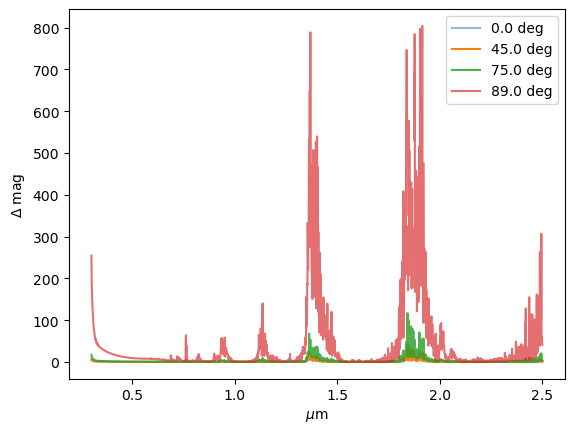

In [21]:
# transmission function using mags on y axis
theta = np.array([0,45,75,89])*un.deg
alphas = np.linspace(0.5,1,len(theta))
tau_theta = []
for i,ang in enumerate(theta):
    tau_theta = (1/np.cos(ang.to(un.rad))) * (np.log(trans['transmission']))
    f = flux * np.exp(-np.abs(tau_theta))
    magdiff = -2.5*np.log10(f/flux)
    plt.plot(wavelen,magdiff,label=str(ang),alpha=alphas[-i])
    plt.xlabel(r"$\mu$m")
    plt.ylabel(r"$\Delta$ mag")
plt.legend()
plt.show()

In [46]:
# For V: roughly 0
# For U: about 10 - thats a lot!

<font color='seagreen'>
It's hard to do ground-based photometry at $U$!

### Q2: Emission from a Planetary Atmosphere

In this question, we will play with a toy model for understanding the emission spectrum of a planet (although the basic concept applies equally well to, for example, a nebula or other cloud of gas/dust). 

Planetary atmospheres are often characterized by the $T-P$ profile, which defines how temperature varies with pressure. Since pressure increases as you go farther down into a planetary atmosphere (assuming hydrostatic equilibrium), the $T-P$ profile characterizes changes in temperature as a function of atmospheric height. Let's imagine a cartoon planetary atmopshere with a $T-P$ profile that follows a power law of the form
$$T(P) = T_{\rm surf}\left(\frac{P}{P_{\rm surf}}\right)^{x}$$

where $P_{\rm surf}$ and $T_{\rm surf}$ are the surface pressure and temperature, and $x$ is some exponent.

+ Derive expressions for $\tau_\lambda(P)$ and $T(\tau_\lambda)$ in this atmosphere, in terms of  $P$, $\tau_\lambda$, $\kappa_\lambda$, and $g$ (the gravitational acceleration). You may assume  $\kappa_\lambda$ and $g$ to be constant throughout the atmosphere, and the atmosphere to be in hydrostatic equilibrium. Assume a plane-parallel atmosphere.

To derive an expression between $\tau$ and $P$, bring together the equation of hydrostatic balance

$$\frac{dP}{dz} = -\rho g$$

and the definition of optical depth

$$d\tau_\lambda = - \kappa_{\lambda} \rho dz $$

to put in $dz = -dP/\rho g$ and find

$$d\tau_\lambda = \frac{\kappa_\lambda}{g} dP$$

which we can integrate from the top of the atmosphere downward 

$$\int^{\tau_\lambda}_{0} d\tau_\lambda = \int^{P}_{0}\frac{\kappa_\lambda}{g} dP$$

which (if $\kappa_\lambda$ is constant) yields

$$\tau_\lambda(P) = \frac{\kappa_\lambda}{g} P.$$

This is why pressure is such a nice vertical coordinate! It's very directly related to optical depth (and with our definition, $\tau$ increases with increasing $P$). Now, to find $T(\tau_{\lambda})$ we can simply plug in $P = \tau_\lambda/\kappa_\lambda{g}$ to our cartoon $T-P$ profile and find

$$T(P) = T_{\rm surf}\left(\frac{P}{P_{\rm surf}}\right)^{x} = T_{\rm surf}\left(\frac{\tau_\lambda g}{P_{\rm surf}\kappa_\lambda}\right)^{x} $$

or if we define the quantity 

$$\tau_{\lambda, \rm surf} = \frac{\kappa_\lambda}{g} P_{\rm surf}$$

to be the optical depth to the surface, then

$$T(P) = T_{\rm surf}\left(\frac{\tau_\lambda}{\tau_{\lambda, \rm surf} }\right)^{x}$$

where of course $\tau_{\lambda, \rm surf}$ will change from wavelength to wavelength depending on the opacities in the atmosphere. ($\tau = 0$ corresponds to us observing the atmosphere from above).


+ Write a Python function that numerically integrates the equation of radiative transfer along a vertical path to determine the outgoing intensity $I_\lambda(0)$ leaving the top of the planet's atmosphere. Write this as a line-by-line radiative transfer code, meaning that you will calculate the intensity at one wavelength at a time. Effectively, you are numerically integrating Rybicki & Lightman Eq 1.29
     + Assume that each layer of the atmosphere emits as a perfect thermal emitter at temperature $T(P)$.
     + Assume that the surface emits as a perfect thermal emitter at temperature $T_{\rm surf}$, so the surface intensity is $I_\lambda(\tau_{\lambda, {\rm surf}}) = B_\lambda(T_{\rm surf})$. Note, it may be helpful to calculate $\tau_{\rm surf, \lambda}$ (the optical depth to the surface). 
     + Perform this integral for a single wavelength at a time. 

In [142]:
import scipy.integrate

def I_outgoing(wave=15*un.um, 
               P_surf=1*un.bar, 
               T_surf=280*un.K, 
               kappa=0.0001*un.m**2/un.kg, ## kappa is constant with wavelength for now
               g=10*un.m/un.s**2, 
               x=1,
               plot=False,
               tau_min=0.01,  ## things get awkward if you actually go to zero
               tau_max=10,
               ntau=100):
    
    
    # calculate the optical depth to the surface
    tau_surf = (kappa/g*P_surf).decompose() ## decompose cancels out units
    if tau_surf <= tau_min:
        tau_surf = tau_min

    # the first term of the integral radiative transfer equation, Eq 1.29 (==transmitted)
    transmitted = planck_intensity(wavelength=wave,temperature=T_surf) * np.exp(-tau_surf)
    
    # the second term of the integral radiative transfer equation, Eq 1.29 (==emitted)
    tau = np.linspace(tau_min, np.minimum(tau_surf, tau_max), ntau)

    ## YOUR CODE HERE: what's the integrand? (function of tau, tau defined above)
    TP = T_surf * (tau/tau_surf)**x
    atmflux = planck_intensity(wavelength=wave,temperature=TP) * np.exp(-tau_surf + tau)

    ## YOUR CODE HERE: use np.trapz to do the integration over tau
    emitted = np.trapezoid(atmflux,x=tau)

    I_surf = planck_intensity(wavelength=wave,temperature=T_surf)
    
    # this will plot the optical depth versus temperature
    if plot:
        
        print("At a wavelength of {}...".format(wave))
        print(" The original surface intensity is {:.4g}.".format(I_surf))
        print(" The surface intensity transmitted through the atmosphere is {:.4g}.".format(transmitted))
        print(" The emitted contribution from the atmosphere is {:.4g}.".format(emitted))
        print(" The total intensity is {:.4g}.".format(transmitted + emitted))
        print("(P_surf={P_surf:.4}, T_surf={T_surf:.4}, kappa={kappa:.4}, g={g:.4}, x={x:+})".format(**locals()))

        T = T_surf*(tau/tau_surf)**x
        fig, ax = plt.subplots(figsize=(3,3))
        plt.sca(ax)
        plt.plot(T, tau, label='$T$ ($K$)')
        plt.ylabel(r'$\tau_\lambda$')
        plt.xlabel('$T$ ($K$)')
        plt.show()
        
    return transmitted + emitted

+ Show that you get $I_{\lambda = 15\mu m} = 2.37~W/m^2/\mu m/sr$ for a wavelength of $\lambda = 15~\mu m$, if we use values of 
    + $T_{\rm surf} = 280~K$
    + $P_{\rm surf} = 1~bar$
    + $x=1$
    + $\kappa_\lambda = 0.0001~m^2/kg$
    + $g=10~m/s^2$

At a wavelength of 15.0 um...
 The original surface intensity is 5273 erg / (micron s sr cm2).
 The surface intensity transmitted through the atmosphere is 1940 erg / (micron s sr cm2).
 The emitted contribution from the atmosphere is 881 erg / (micron s sr cm2).
 The total intensity is 2821 erg / (micron s sr cm2).
(P_surf=1.0 bar, T_surf=280.0 K, kappa=0.0001 m2 / kg, g=10.0 m / s2, x=+1)


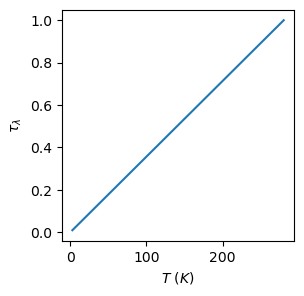

<Quantity 2.82092439 J / (micron s sr m2)>

In [178]:
I_outgoing(plot=True, ntau=100, x=1).to(un.joule / un.second / un.m**2 / un.micron / un.steradian)

+ Imagine our atmosphere contains one gas. Let's call it "ceceliapaynium". Its mass opacity is given by the function
$$\kappa_\lambda = \kappa_c \exp \left[-\frac{1}{2}\left(\frac{\lambda - \lambda_c}{\sigma_c}\right)^2 \right]$$
which is opaque near the center of the line at $\lambda_c$ and more transparent for wavelengths farther from the line center (this is standard for a single spectral line). We will start out with $\kappa_c = 0.0001~m^2/kg$, $\lambda_c = 15~\mu m$, $\sigma_c = 1 ~\mu m$.

In [144]:
def kappa_ceciliapaynium(w, kappa_0=0.0001*un.m**2/un.kg, w_0=15*un.um, sigma_0=1*un.um):
    '''
    Returns the mass opacity coefficient (m^2/kg) 
    as a function of wavelength,
    for the imaginary molecule ceceliapaynium.
    '''
    
    kappa_lambda = kappa_0 * np.exp(-0.5 * ((w - w_0)/sigma_0)**2)
    return kappa_lambda

<font color='seagreen'>
The following should get you the same answer as before, since at $w=w_0$, $\kappa$ is equal to the value we used before:

In [155]:
w = 15*un.um
I_outgoing(plot=False, ntau=100, kappa=kappa_ceciliapaynium(w)).to(un.joule / un.second / un.m**2 / un.micron / un.steradian) ## supplying the kappa for this wavelength

<Quantity 2.82092439 J / (micron s sr m2)>

+ Now, let's vary the temperature structure of the atmosphere. Plot the outgoing intensity spectra for the three cases of $x=(-1, 0, 1)$, with at least 100 wavelengths spanning $1-100~\mu m$. 

To do this properly and maintain the right units (unlike in the last project!) create an array I as an array of zeros with the right units. To set each element, use `I[i] += {value}` where value also has the right units.


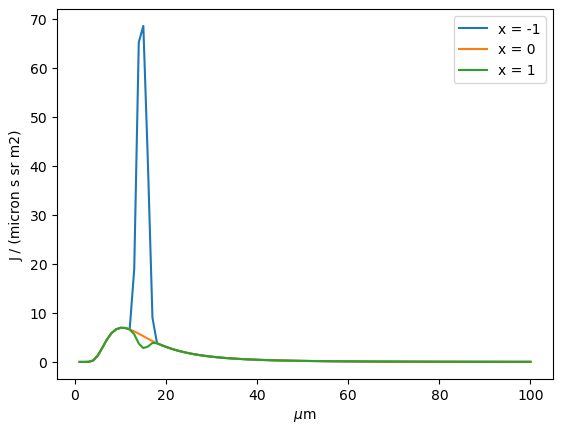

In [174]:
wrange = np.linspace(1,100,100)*un.um
xlst = [-1,0,1]
I = np.empty((3,100)) * (un.joule / un.second / un.m**2 / un.micron / un.steradian)

for i,x in enumerate(xlst):
    for j,w in enumerate(wrange):
        I[i,j] = I_outgoing(wave=w, plot=False, ntau=100, kappa=kappa_ceciliapaynium(w), x=x).to(un.joule / un.second / un.m**2 / un.micron / un.steradian)
    plt.plot(wrange,I[i],label="x = " + str(x))
plt.xlabel(r"$\mu$m")
plt.ylabel(I[0,0].unit)
plt.legend()
plt.show()


+ Discuss qualitatively how the appearance of the absorption or emission feature relates to the vertical temperature profile (think about which layer is hotter and which is colder in each temperature profile; you may want to refer to Kirchoff's law--not the one in our textbook, but the one you learned in intro astronomy).

When x = 1 we see an absorbtion line at $\sim15 \mu m$ because optical depth increases with temperature, meaning $\kappa$ is also increasing. Since our $\kappa$ is defined about that wavelength, more photons are absorbed in the atmosphere there. 

When x = -1 we see an emission line at $\sim15 \mu m$ because the optical depth decreases with increasing atmospheric temperature, which means that the opposite effect as the above happens. 

At x = 0, we just see the standard Planck function. 